In [2]:
import pandas as pd
import os
import re
import datetime


os.chdir("C:/Users/YJ/Documents/1) Learning/Udacity - Machine Learning/capstone/Submission")

data = pd.read_hdf("DJUSTC Prices and Ratios.h5","Output")

In [3]:
data.index = data.date
data=data.drop("date",axis=1)
pivot= data.pivot_table(index=data.index,columns=data.ticker)
pivot.columns.names = ['data_type','ticker']

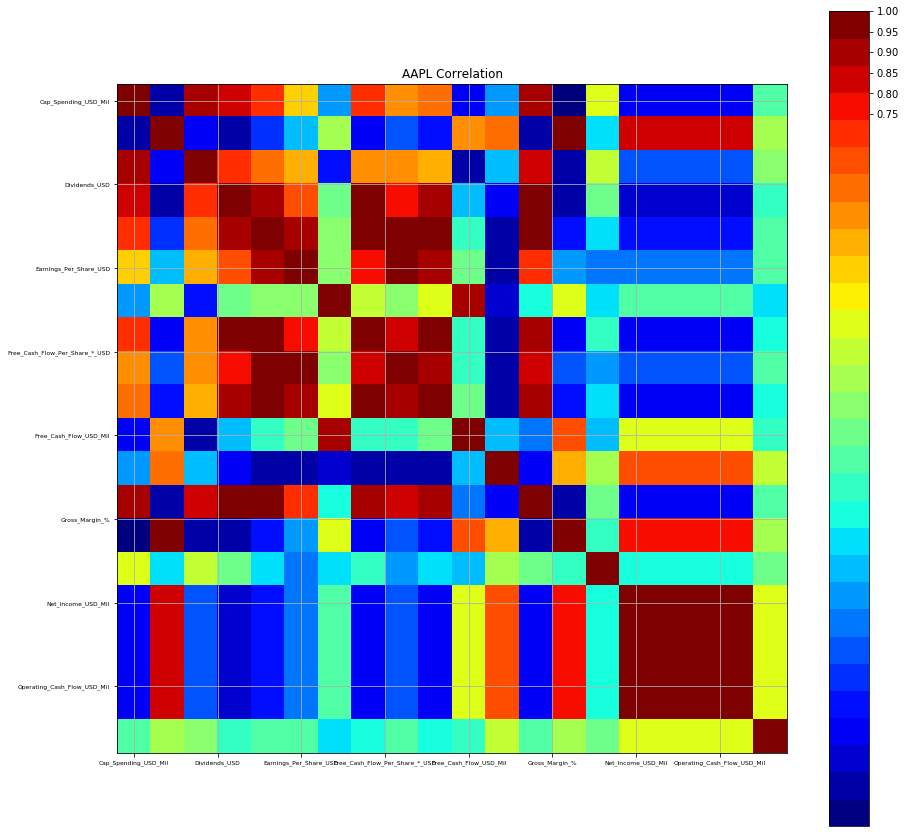

In [14]:
def correlation_matrix(df,title):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(title +' Correlation')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(pivot.xs('AAPL',level=1,axis=1),'AAPL')